In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

In [3]:
#load the dataset and print the head
df=pd.read_csv("group-edges.csv")
df1=pd.read_csv("meta-groups.csv")
df.head()

,Unnamed: 0,group1,group2,weight
0,0,19292162,535553,2
1,1,19292162,19194894,1
2,2,19292162,19728145,1
3,3,19292162,18850080,2
4,4,19292162,1728035,1


In [5]:
df1.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


In [6]:
df.describe().T #Statical value in Table form

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6692.0,3.345500e+03,1.931958e+03,0.0,1672.75,3345.5,5018.25,6691.0
group1,6692.0,1.253506e+07,8.296540e+06,168014.0,2150491.00,16487812.0,19266390.00,26091301.0
group2,6692.0,1.296296e+07,8.115721e+06,47094.0,3376042.00,16487812.0,19416348.00,26091301.0
weight,6692.0,2.301853e+00,4.089973e+00,1.0,1.00,1.0,2.00,91.0


In [7]:
df.isnull().sum() #check the null value

Unnamed: 0    0
group1        0
group2        0
weight        0
dtype: int64

In [8]:
#Statical value in Table form
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
group_id,602.0,1.690675e+07,8.149222e+06,47094.0,12013759.5,19469035.5,2.287458e+07,26296592.0
num_members,602.0,5.514385e+02,1.002695e+03,2.0,67.0,201.5,6.000000e+02,15838.0
category_id,602.0,1.912625e+01,1.187010e+01,1.0,9.0,21.0,3.100000e+01,36.0
organizer_id,602.0,1.106295e+08,8.745972e+07,8386.0,12553128.5,108086447.0,1.967602e+08,237353086.0


In [9]:
df1.isnull().sum() #check the null value

group_id         0
group_name       0
num_members      0
category_id      0
category_name    0
organizer_id     0
group_urlname    0
dtype: int64

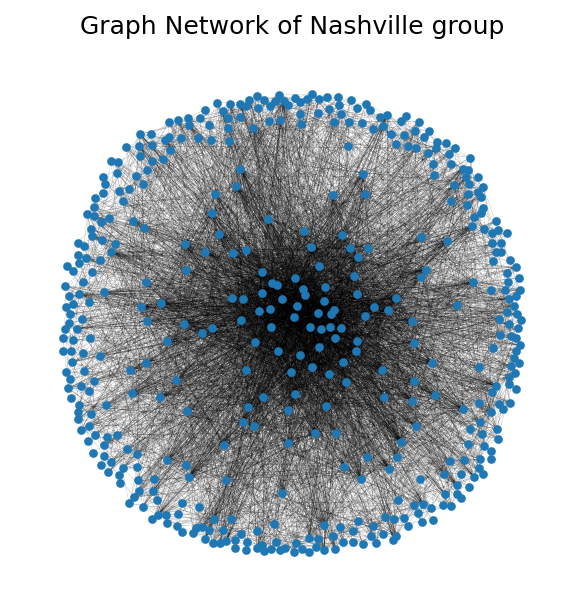

In [10]:
g0= nx.from_pandas_edgelist(df,'group1', 'group2','weight')
plt.figure(dpi=150)

pos = nx.spring_layout(g0, k=2)
# pos = nx.random_layout(g)
nx.draw_networkx(g0, pos, with_labels=False, node_size=10,
                 width=0.05)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville group')
plt.show()

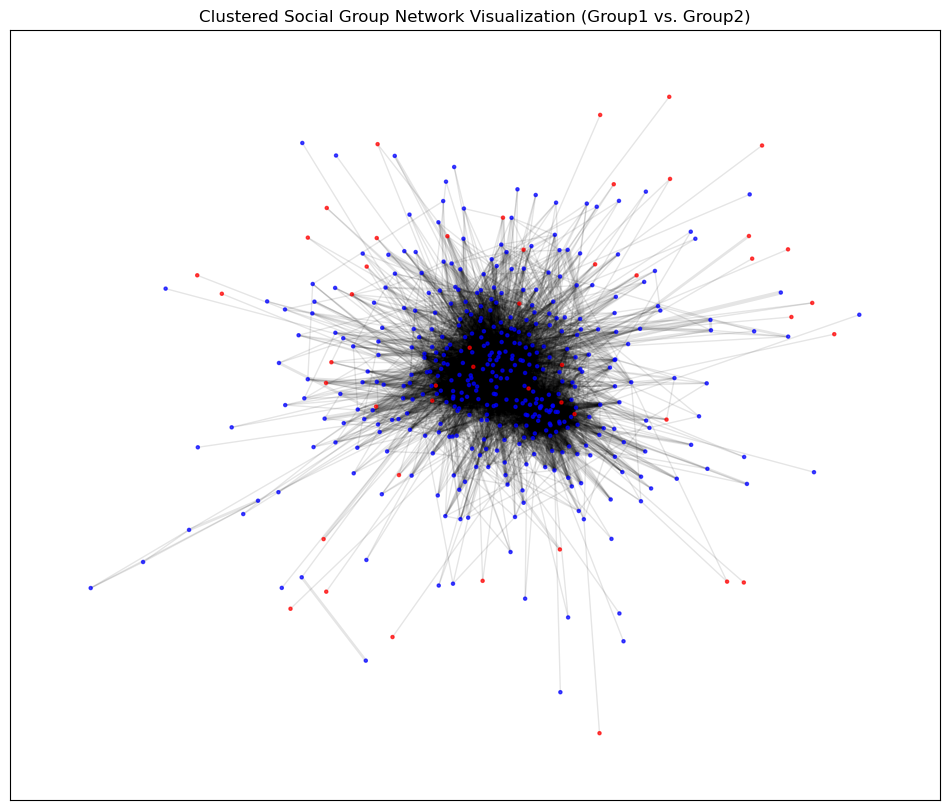

In [11]:
G = nx.from_pandas_edgelist(df, source='group1', target='group2', edge_attr='weight')
# Add edges to the graph using group1, group2, and weight
for _, row in df.iterrows():
    G.add_edge(row['group1'], row['group2'], weight=row['weight'])

# Creating a set of nodes that belong to group1 and group2
group1_nodes = set(df['group1'])
group2_nodes = set(df['group2'])

# Assign colors to nodes based on their group
node_colors = []
for node in G.nodes():
    if node in group1_nodes:
        node_colors.append('blue')  # Color for group1
    elif node in group2_nodes:
        node_colors.append('red')  # Color for group2
    else:
        node_colors.append('gray')  # Default color for unclassified nodes

# Create a layout for the graph
pos = nx.spring_layout(G, k=0.1, iterations=20)

# Plot the network graph
plt.figure(figsize=(12, 10))

# Draw nodes with colors based on their group
nx.draw_networkx_nodes(G, pos, node_size=5, node_color=node_colors, alpha=0.7)

# Draw edges with width based on weight
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, alpha=0.1, edge_color='black')


# Title
plt.title("Clustered Social Group Network Visualization (Group1 vs. Group2)")

# Show the plot
plt.show()

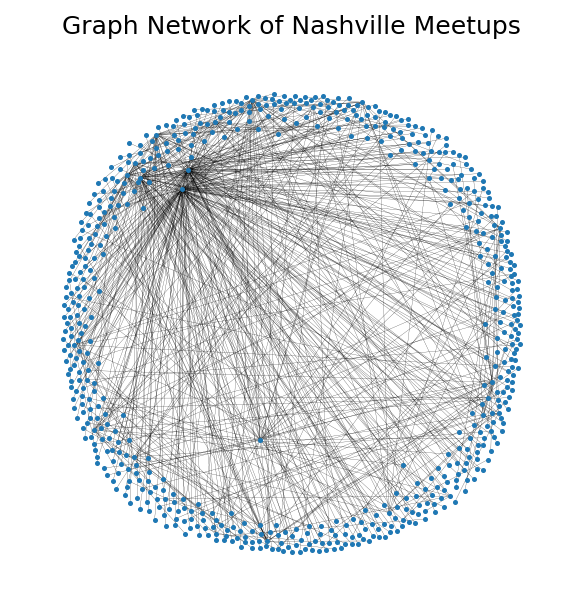

In [12]:
G= nx.from_pandas_edgelist(df1,'category_name', 'group_id','num_members')
plt.figure(dpi=150)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos, with_labels=False,node_size=2,width=0.1)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville Meetups')
plt.show()

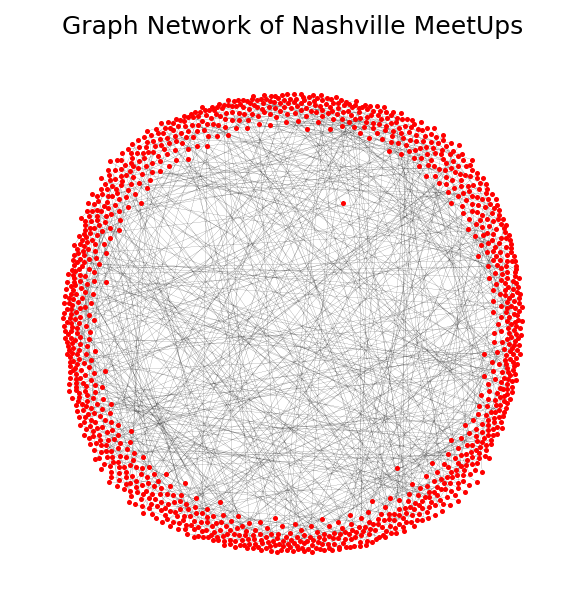

In [13]:
g = nx.from_pandas_edgelist(df1, source='group_name', target='group_id',edge_attr='num_members')

plt.figure(dpi=150)

pos = nx.spring_layout(g, k=2)
nx.draw_networkx(g, pos, with_labels=False,node_color='red',node_size=2,width=0.06)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville MeetUps')
plt.show()

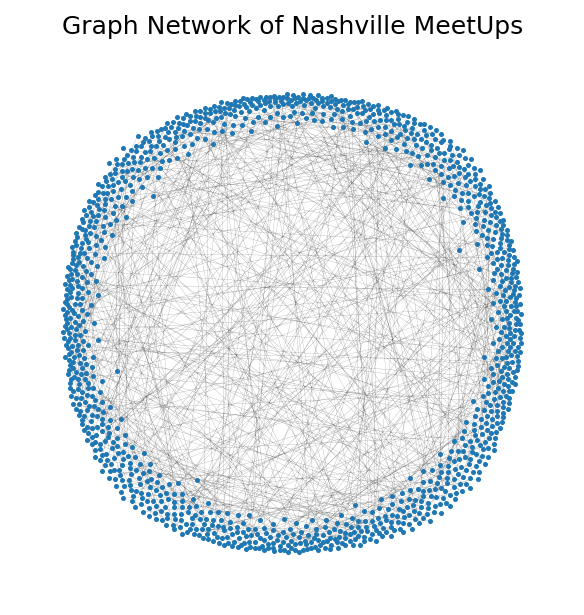

In [14]:
g = nx.from_pandas_edgelist(df1, source='group_name', target='group_id')

plt.figure(dpi=150)

pos = nx.spring_layout(g, k=2)
nx.draw_networkx(g, pos, with_labels=False,node_size=2,width=0.05)
pos = nx.random_layout(g)
ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville MeetUps')
plt.show()

In [18]:

g = nx.from_pandas_edgelist(df1, source='group_id', target='group_name')

# Get the edges and nodes
edges = list(g.edges())
labels = list(g.nodes())

# Create a list to hold the data for the Sunburst chart
sunburst_data = {
    "ids": [],
    "labels": [],
    "parents": [],
    "colors": [],
}

# Create a unique color for each group_name
group_names = df1['group_id'].unique()
color_map = {group: idx for idx, group in enumerate(group_names)}

# Populate the sunburst_data
for parent, child in edges:
    sunburst_data["ids"].append(parent)
    sunburst_data["labels"].append(parent)
    sunburst_data["parents"].append("")
    sunburst_data["colors"].append(color_map[parent])

    sunburst_data["ids"].append(child)
    sunburst_data["labels"].append(child)
    sunburst_data["parents"].append(parent)
    sunburst_data["colors"].append(color_map[parent])

# Convert to a DataFrame 
sunburst_df = pd.DataFrame(sunburst_data)

# Create the Sunburst chart
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['ids'],
    labels=sunburst_df['labels'],
    parents=sunburst_df['parents'],
    marker=dict(colors=sunburst_df['colors']),
    branchvalues="total" 
))

# Update layout with title 
fig.update_layout(
    title="Radial Icicle of Nashville MeetUps",
    margin=dict(t=50, l=0, r=0, b=0),
    sunburstcolorway=["#FF6347", "#FF4500", "#FF8C00", "#FFD700", "#32CD32", "#1E90FF", "#8A2BE2"] 
)

fig.show()

In [19]:
tech=df1.loc[df1.category_name=='Tech']
tech.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
11,11625832,PyNash,1442,34,Tech,215201845,PyNash
13,19218850,Greater Nashville Healthcare Analytics,764,34,Tech,12825115,Greater-Nashville-Healthcare-Analytics
19,18589616,Agile Nashville User Group,862,34,Tech,126249582,Agile-Nashville-User-Group
23,19277993,Nashville DevOps Meetup,502,34,Tech,183378188,NashDevOps


In [27]:
g = nx.from_pandas_edgelist(tech, source='group_name', target='group_id')


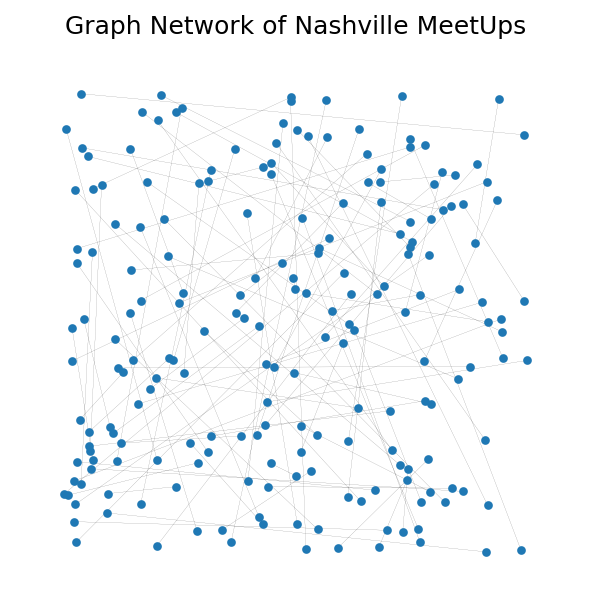

In [28]:
plt.figure(dpi=150)

pos = nx.spring_layout(g, k=2)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos, with_labels=False,node_size=10,
                 width=0.05)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville MeetUps')
plt.show()

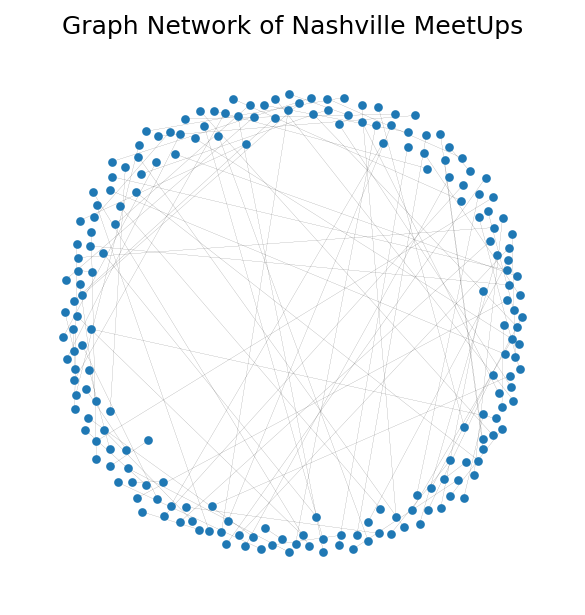

In [29]:
plt.figure(dpi=150)

pos = nx.spring_layout(g, k=2)

nx.draw_networkx(g, pos, with_labels=False,node_size=10,
                 width=0.05)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville MeetUps')
plt.show()

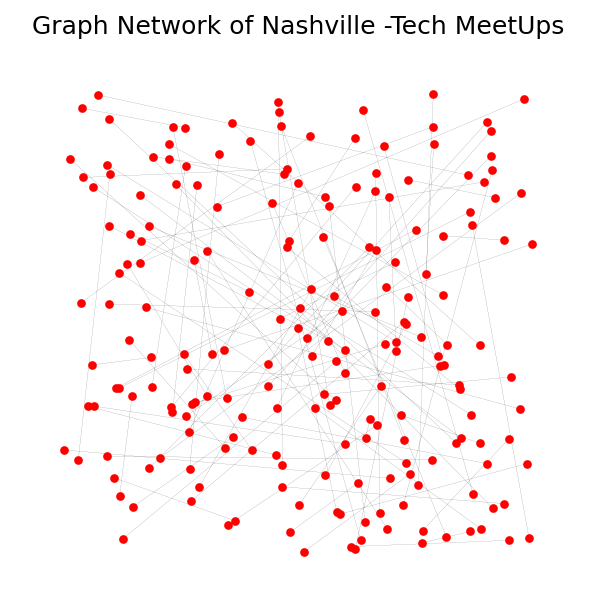

In [25]:
g = nx.from_pandas_edgelist(tech, source='group_name', target='group_id')

plt.figure(dpi=150)

pos = nx.spring_layout(g, k=2)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos, with_labels=False,node_color='red',node_size=10,width=0.05)

ax = plt.gca()
ax.set_aspect(1)
ax.axis('off')
ax.set_title('Graph Network of Nashville -Tech MeetUps')
plt.show()

In [233]:
g = nx.from_pandas_edgelist(tech, source='group_id', target='group_name')

# Getting the hierarchical structure 
edges = list(g.edges())
labels = list(g.nodes())

# Create a list for the Sunburst chart
sunburst_data = {
    "ids": [],
    "labels": [],
    "parents": [],
}

for parent, child in edges:
    sunburst_data["ids"].append(parent)
    sunburst_data["labels"].append(parent)
    sunburst_data["parents"].append("")

    sunburst_data["ids"].append(child)
    sunburst_data["labels"].append(child)
    sunburst_data["parents"].append(parent)

# Convert to a DataFrame for Plotly
sunburst_df = pd.DataFrame(sunburst_data)

# Create Sunburst chart
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['ids'],
    labels=sunburst_df['labels'],
    parents=sunburst_df['parents'],
    marker=dict(colors=[0] * len(sunburst_df['labels'])), 
))

fig.update_layout(
    title="Graph Network of Nashville Tech-MeetUps",title_x=0.5,
    margin=dict(t=50, l=0, r=0, b=0),
    sunburstcolorway=["#FF6347", "#FF4500", "#FF8C00", "#FFD700"]  
)

fig.show()


In [30]:
g = nx.from_pandas_edgelist(tech, source='group_id', target='group_name')

# Get the edges and nodes
edges = list(g.edges())
labels = list(g.nodes())

# Create a list
sunburst_data = {
    "ids": [],
    "labels": [],
    "parents": [],
    "colors": [],
}

# Create a unique color for each group_name
group_names = tech['group_id'].unique()
color_map = {group: idx for idx, group in enumerate(group_names)}

for parent, child in edges:
    sunburst_data["ids"].append(parent)
    sunburst_data["labels"].append(parent)
    sunburst_data["parents"].append("")
    sunburst_data["colors"].append(color_map[parent])

    sunburst_data["ids"].append(child)
    sunburst_data["labels"].append(child)
    sunburst_data["parents"].append(parent)
    sunburst_data["colors"].append(color_map[parent])

# Convert to a DataFrame 
sunburst_df = pd.DataFrame(sunburst_data)

# Create the Sunburst chart
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['ids'],
    labels=sunburst_df['labels'],
    parents=sunburst_df['parents'],
    marker=dict(colors=sunburst_df['colors']),
    branchvalues="total" 
))

# Update layout with title 
fig.update_layout(
    title="Nashville Tech MeetUps(Icicle Treemap)",title_x=0.5,
    margin=dict(t=50, l=0, r=0, b=0),
    sunburstcolorway=["#FF6347", "#FF4500", "#FF8C00", "#FFD700", "#32CD32", "#1E90FF", "#8A2BE2"]  
)

fig.show()



In [31]:
g = nx.from_pandas_edgelist(tech, source='group_name', target='group_id')

# Get the edges and nodes
edges = list(g.edges())
labels = list(g.nodes())

# Create lists for Treemap
treemap_data = {
    "labels": [],
    "parents": [],
    "values": [], 
    "colors": []
}

# Create a unique color for each group_name
group_names = tech['group_name'].unique()
color_map = {group: idx for idx, group in enumerate(group_names)}

# Populate the treemap_data
for parent, child in edges:
    # Adding parent node
    treemap_data["labels"].append(parent)
    treemap_data["parents"].append("")
    treemap_data["values"].append(1)  
    treemap_data["colors"].append(color_map[parent])

    # Adding child node
    treemap_data["labels"].append(child)
    treemap_data["parents"].append(parent)
    treemap_data["values"].append(1) 
    treemap_data["colors"].append(color_map[parent])

# Convert to a DataFrame
treemap_df = pd.DataFrame(treemap_data)

# Create the Treemap chart
fig = go.Figure(go.Treemap(
    labels=treemap_df['labels'],
    parents=treemap_df['parents'],
    values=treemap_df['values'],
    marker=dict(colors=treemap_df['colors'], showscale=False),
    textinfo="label+value",
))

# layout for better visualization
fig.update_layout(
    title="Stable Tree Map of Nashville MeetUps",
    margin=dict(t=50, l=0, r=0, b=0),
    treemapcolorway=["#FF6347", "#FF4500", "#FF8C00", "#FFD700", "#32CD32", "#1E90FF", "#8A2BE2"], 
)

fig.show()


In [32]:
g = nx.from_pandas_edgelist(tech, source='group_name', target='num_members')

# Create lists for Treemap
treemap_data = {
    "labels": [],
    "parents": [],
    "values": [],  
    "colors": []
}

# Create a unique color 
group_names = tech['group_name'].unique()
color_map = {group: idx for idx, group in enumerate(group_names)}

for group in group_names:
    # Adding parent node
    treemap_data["labels"].append(group)
    treemap_data["parents"].append("") 
    treemap_data["values"].append(tech[tech['group_name'] == group]['num_members'].sum())
    treemap_data["colors"].append(color_map[group])

# Convert to a DataFrame
treemap_df = pd.DataFrame(treemap_data)

# Create the Treemap chart
fig = go.Figure(go.Treemap(
    labels=treemap_df['labels'],
    parents=treemap_df['parents'],
    values=treemap_df['values'],
    marker=dict(colors=treemap_df['colors'], showscale=False),
    textinfo="label+value", 
))

fig.update_layout(
    title="Tree Map of Nashville Tech MeetUps",title_x=0.5,
    title_font=dict(size=20, family="Arial", color="RED"), 
    margin=dict(t=50, l=0, r=0, b=0),
    treemapcolorway=["#FF6347", "#FF4500", "#FF8C00", "#FFD700", "#32CD32", "#1E90FF", "#8A2BE2"], 
)

fig.show()
